In [201]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

You can start by exploring a few questions:

1)What type of content is available in different countries?

2)How has the number of movies released per year changed over the last 20-30 years?

3)Comparison of tv shows vs. movies.

4)What is the best time to launch a TV show?

5)Does Netflix has more focus on TV Shows than movies in recent years?

6)Analysis of actors/directors of different types of shows/movies.


In [202]:
df = pd.read_csv('/content/netflix_data.csv')

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [204]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [205]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [206]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **1)What type of content is available in different countries?**

In [207]:
df['type'].unique() # смотрю уникальные типы контента

array(['Movie', 'TV Show'], dtype=object)

In [208]:
df_country = df[df['country'].notnull()] # отбрасываю пустые значения и записываю в новый дата фрейми

In [209]:
df_country['country'] = df_country['country'].str.split(',').str[0] # в столбце 'country' есть строчки где страны записаны через запятую, выбираем первую страну и оставляем ее

<ipython-input-209-10f7b7537cd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['country'] = df_country['country'].str.split(',').str[0] # в столбце 'country' есть строчки где страны записаны через запятую, выбираем первую страну и оставляем ее


In [210]:
df_country.head() # смотрю первые 5 записей

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [211]:
df_country = df_country[(df_country['country'].str.match(r'^[a-zA-Z]+$'))] # оставляю только буквенные строчки

In [212]:
df_country.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",Germany,"September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
17,s18,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...
21,s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [213]:
content_by_country = df_country.groupby(['country', 'type'], as_index = False )['title'].count() #считаю сколько какого контента смотрят в разных странах

In [214]:
content_by_country

,country,type,title
0,Argentina,Movie,56
1,Argentina,TV Show,20
2,Australia,Movie,61
3,Australia,TV Show,56
4,Austria,Movie,8
...,...,...,...
110,Uruguay,Movie,8
111,Uruguay,TV Show,1
112,Venezuela,Movie,2
113,Vietnam,Movie,7


## **2)How has the number of movies released per year changed over the last 20-30 years?**

In [215]:
df[(df['type'] == 'Movie')&(df['release_year'] > 1993)].groupby('release_year').agg({'show_id':'count'})

,show_id
release_year,
1994,20
1995,23
1996,21
1997,34
1998,32
1999,32
2000,33
2001,40
2002,44


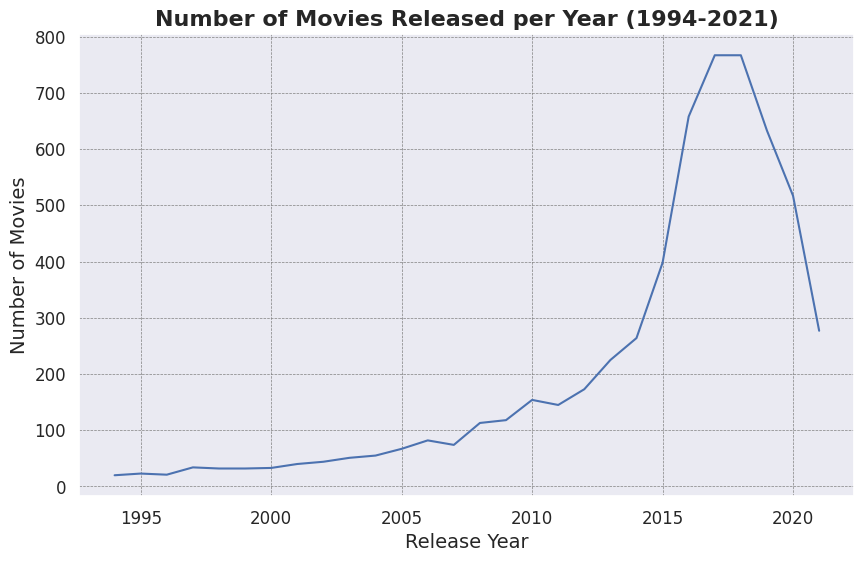

In [216]:
df_filtered = df[(df['type'] == 'Movie')&(df['release_year'] > 1993)]

df_grouped = df_filtered.groupby('release_year').agg({'show_id':'count'}).reset_index()

sns.set_style("whitegrid")
sns.set_palette("husl")
sns.set(rc={"figure.figsize":(10, 6)})
sns.lineplot(x='release_year', y='show_id', data=df_grouped)

plt.title('Number of Movies Released per Year (1994-2021)', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='grey', linestyle='--', linewidth=0.5)

plt.show()

**Падение кол-во релизов в 2021, связано с короновирусом.**

# **3)Comparison of tv shows vs. movies.**

In [217]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

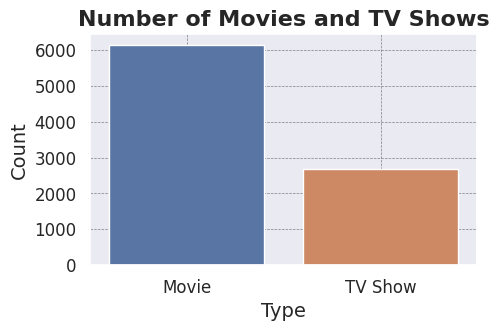

In [218]:
type_counts = df['type'].value_counts()

sns.set_style("whitegrid")
sns.set_palette("husl")
sns.set(rc={"figure.figsize":(5, 3)})
sns.barplot(x=type_counts.index, y=type_counts.values)

plt.title('Number of Movies and TV Shows', fontsize=16, fontweight='bold')
plt.xlabel('Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='grey', linestyle='--', linewidth=0.5)

plt.show()

In [219]:
df_country.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",Germany,"September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
17,s18,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...
21,s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [220]:
df_country[df_country['type'] == 'TV Show'].groupby('country').size().sort_values(ascending=False).head()

country
Japan     174
Canada     84
India      81
Taiwan     70
France     64
dtype: int64

In [221]:
df_country[df_country['type'] == 'Movie'].groupby('country').size().sort_values(ascending=False).head()

country
India     927
Canada    187
France    148
Spain     129
Egypt      98
dtype: int64

# **4)What is the best time to launch a TV show?**

In [222]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [223]:
df['month'] = df['date_added'].str.split().str[0]

In [224]:
df.groupby('month', as_index = False).agg({'show_id':'count'})

,month,show_id
0,April,764
1,August,755
2,December,813
3,February,563
4,January,738
5,July,827
6,June,728
7,March,742
8,May,632
9,November,705


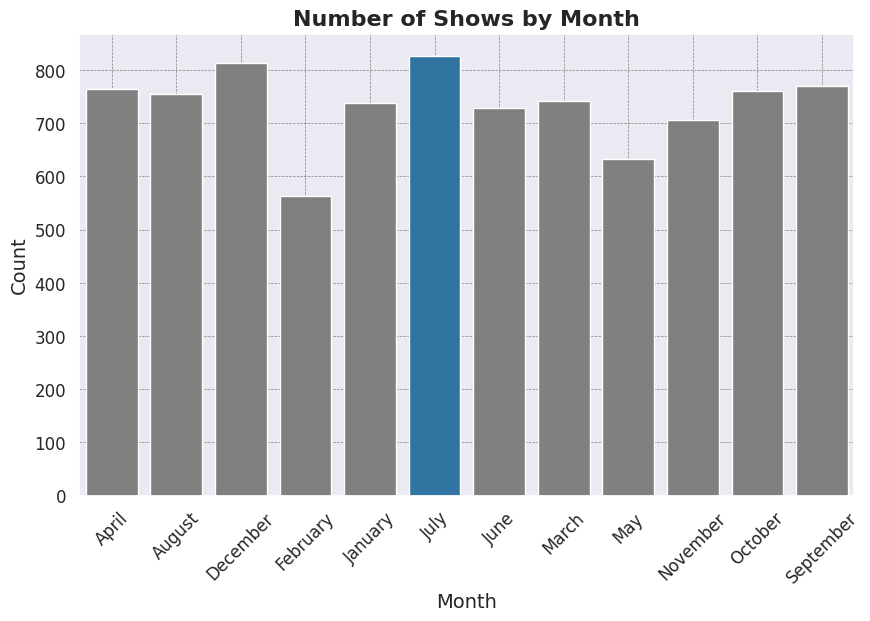

In [225]:
month_counts = df.groupby('month', as_index=False).agg({'show_id': 'count'})

max_month = month_counts.loc[month_counts['show_id'].idxmax(), 'month']

colors = ['tab:blue' if month == max_month else 'grey' for month in month_counts['month']]

sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(10, 6)})
sns.barplot(x='month', y='show_id', data=month_counts, palette=colors)

plt.title('Number of Shows by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(color='grey', linestyle='--', linewidth=0.5)

plt.show()

# **5)Does Netflix has more focus on TV Shows than movies in recent years?**

In [226]:
df_release_year_type = df[df['release_year']>2014].groupby(['release_year','type']).agg({'show_id':'count'}).unstack(level=-1)

In [227]:
df_release_year_type

show_id        
type           Movie TV Show
release_year                
2015             398     162
2016             658     244
2017             767     265
2018             767     380
2019             633     397
2020             517     436
2021             277     315

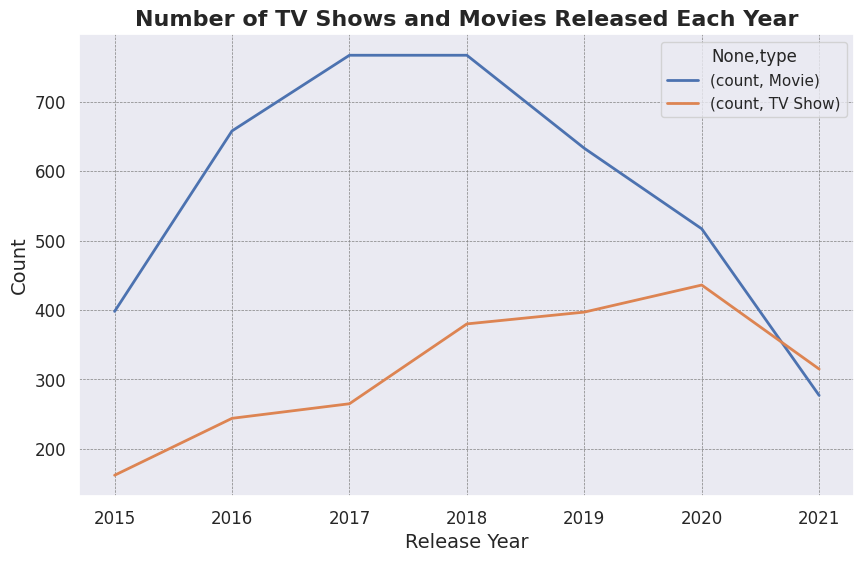

In [228]:
df_release_year_type = df[df['release_year'] > 2014].groupby(['release_year', 'type']).agg({'show_id': 'count'}).rename(columns={'show_id':'count'}).unstack(level=-1)

df_release_year_type.plot(kind='line', figsize=(10, 6), linewidth=2)

plt.title('Number of TV Shows and Movies Released Each Year', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='grey', linestyle='--', linewidth=0.5)

plt.show()

# **6)Analysis of actors/directors of different types of shows/movies.**

In [229]:
df_type = df.groupby(['director', 'type'])['show_id'].count().unstack(fill_value=0).reset_index()

In [230]:
df_type[(df_type['TV Show']>0)&(df_type['Movie']>0)]

type,director,Movie,TV Show
145,Alessandro Angulo,1,1
452,BB Sasore,2,1
543,Billy Corben,1,1
570,Brad Anderson,3,1
638,Bunmi Ajakaiye,1,1
850,Cosima Spender,2,1
888,Dan Forrer,1,1
914,Daniel Kontur,1,1
961,David Ayer,3,1
1161,Eli Roth,2,1
